In [1]:
%matplotlib inline

In [2]:
! pwd

/data/srlab1/TCAT/Analysis/PerDataset/Stimseq


In [3]:
import scanpy  as sc
import muon as mu
import numpy as np
import matplotlib.pyplot as plt
from cnmf import Preprocess
import pandas as pd
import os
import seaborn as sns


from matplotlib import rcParams, font_manager
import matplotlib


rcParams['pdf.fonttype'] = 42
rcParams['ps.fonttype'] = 42
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']


sc.logging.print_versions()

/PHShome/dk718/miniforge3/envs/cnmf_env2v3/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


-----
anndata     0.8.0
scanpy      1.9.1
-----
PIL                 9.1.0
backcall            0.2.0
beta_ufunc          NA
binom_ufunc         NA
cached_property     1.5.2
cffi                1.15.0
cloudpickle         2.2.1
cnmf                NA
colorama            0.4.4
cycler              0.10.0
cython_runtime      NA
dask                2022.02.0
dateutil            2.8.2
debugpy             1.6.0
decorator           5.1.1
defusedxml          0.7.1
entrypoints         0.4
fastcluster         1.2.6
fsspec              2023.1.0
h5py                3.6.0
harmonypy           NA
igraph              0.9.9
ipykernel           6.13.0
ipython_genutils    0.2.0
jedi                0.18.1
jinja2              3.1.1
joblib              1.1.0
jupyter_server      1.16.0
kiwisolver          1.4.2
leidenalg           0.8.9
llvmlite            0.38.0
markupsafe          2.1.1
matplotlib          3.5.1
matplotlib_inline   NA
mpl_toolkits        NA
mudata              0.2.1
muon                0.1.3


In [4]:
figdir = '../../../Figures/Components'

In [5]:
adata_fn =  '../../../Data/PerDataset/Stimseq/stimseq.pilot2.RNA_and_ADT.VarNorm.HVG.HarmonyGeneCorrect.h5ad'

In [6]:
adata = sc.read(adata_fn)

Only considering the two last: ['.HarmonyGeneCorrect', '.h5ad'].
Only considering the two last: ['.HarmonyGeneCorrect', '.h5ad'].


In [7]:
adata_raw = sc.AnnData(X=adata.raw.X, obs=adata.obs, var=adata.raw.var)

In [8]:
adata_ADT = adata_raw[:,adata_raw.var['feature_type'] == 'Antibody Capture'].copy()

In [9]:
adata_ADT.X.sum(axis=1)

matrix([[1798.],
        [1051.],
        [2080.],
        ...,
        [ 860.],
        [ 780.],
        [ 901.]], dtype=float32)

# Process full dataset

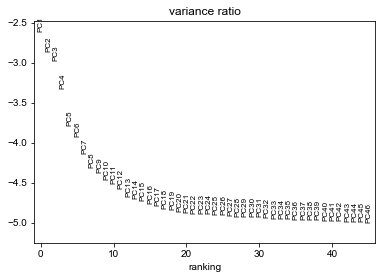

In [10]:
sc.pp.normalize_per_cell(adata_ADT, counts_per_cell_after=1e4)
Z = adata_ADT.X.todense()
Z[Z==0] = np.nan
gmean = np.exp(np.nansum(np.log(Z+1), axis=1) / Z.shape[1])
Z = np.log((Z / gmean) + 1)
Z[np.isnan(Z)]=0
adata_ADT.X = np.array(Z)

sc.pp.scale(adata_ADT, zero_center=False, max_value=15)

sc.tl.pca(adata_ADT, zero_center=True)
sc.pl.pca_variance_ratio(adata_ADT, log=True, n_pcs=45)

In [11]:
harmony_vars = ['Run', 'Biobank_ID', 'Sort_Status']

In [12]:
sc.external.pp.harmony_integrate(adata_ADT,  harmony_vars, max_iter_harmony = 30)

2024-02-26 19:44:19,279 - harmonypy - INFO - Iteration 1 of 30
2024-02-26 19:44:35,393 - harmonypy - INFO - Iteration 2 of 30
2024-02-26 19:44:51,540 - harmonypy - INFO - Iteration 3 of 30
2024-02-26 19:45:07,570 - harmonypy - INFO - Iteration 4 of 30
2024-02-26 19:45:23,651 - harmonypy - INFO - Iteration 5 of 30
2024-02-26 19:45:31,710 - harmonypy - INFO - Iteration 6 of 30
2024-02-26 19:45:37,573 - harmonypy - INFO - Iteration 7 of 30
2024-02-26 19:45:42,712 - harmonypy - INFO - Converged after 7 iterations


In [13]:
adata_ADT

AnnData object with n_obs × n_vars = 42370 × 137
    obs: 'barcode', 'BRI', 'Run', 'Well', 'Batch', 'Biobank_ID', 'Sort_Status', 'HTO_Status', 'Demuxlet_Assignment', 'Total_RNA_Count', 'Total_ADT_Count', 'Total_HTO_Count', 'frac_ADT', 'A_cdr3', 'B_cdr3', 'DEMUX_RD.UNIQ', 'DEMUX_N.SNP', 'DEMUX_BEST', 'DEMUX_SNG.1ST', 'DEMUX_SNG.LLK1', 'DEMUX_DBL.1ST', 'DEMUX_DBL.2ND', 'DEMUX_LLK12', 'DEMUX_PRB.DBL', 'DEMUX_PRB.SNG1', 'batch_name', 'B_is_cell', 'B_high_confidence', 'B_full_length', 'B_productive', 'B_length', 'B_v_gene', 'B_d_gene', 'B_j_gene', 'B_c_gene', 'B_cdr1', 'B_cdr2', 'B_cdr3_nt', 'B_reads', 'B_umis', 'B_raw_clonotype_id', 'B_raw_consensus_id', 'B_Num_Hits_In_Barcode', 'B_Next_Highest_ReadCount', 'B_Num_Productive_In_Barcode', 'B_Has_Unproductive', 'A_is_cell', 'A_high_confidence', 'A_full_length', 'A_productive', 'A_length', 'A_v_gene', 'A_d_gene', 'A_j_gene', 'A_c_gene', 'A_cdr1', 'A_cdr2', 'A_cdr3_nt', 'A_reads', 'A_umis', 'A_raw_clonotype_id', 'A_raw_consensus_id', 'A_Num_Hit

In [14]:
sc.write('../../../Data/PerDataset/Stimseq/stimseq.pilot2.ADT.VarNorm.HarmonyGeneCorrect.h5ad', adata_ADT)

Only considering the two last: ['.HarmonyGeneCorrect', '.h5ad'].
Only considering the two last: ['.HarmonyGeneCorrect', '.h5ad'].


# RNA clustering association with ADT

AnnData object with n_obs × n_vars = 42370 × 137
    obs: 'barcode', 'BRI', 'Run', 'Well', 'Batch', 'Biobank_ID', 'Sort_Status', 'HTO_Status', 'Demuxlet_Assignment', 'Total_RNA_Count', 'Total_ADT_Count', 'Total_HTO_Count', 'frac_ADT', 'A_cdr3', 'B_cdr3', 'DEMUX_RD.UNIQ', 'DEMUX_N.SNP', 'DEMUX_BEST', 'DEMUX_SNG.1ST', 'DEMUX_SNG.LLK1', 'DEMUX_DBL.1ST', 'DEMUX_DBL.2ND', 'DEMUX_LLK12', 'DEMUX_PRB.DBL', 'DEMUX_PRB.SNG1', 'batch_name', 'B_is_cell', 'B_high_confidence', 'B_full_length', 'B_productive', 'B_length', 'B_v_gene', 'B_d_gene', 'B_j_gene', 'B_c_gene', 'B_cdr1', 'B_cdr2', 'B_cdr3_nt', 'B_reads', 'B_umis', 'B_raw_clonotype_id', 'B_raw_consensus_id', 'B_Num_Hits_In_Barcode', 'B_Next_Highest_ReadCount', 'B_Num_Productive_In_Barcode', 'B_Has_Unproductive', 'A_is_cell', 'A_high_confidence', 'A_full_length', 'A_productive', 'A_length', 'A_v_gene', 'A_d_gene', 'A_j_gene', 'A_c_gene', 'A_cdr1', 'A_cdr2', 'A_cdr3_nt', 'A_reads', 'A_umis', 'A_raw_clonotype_id', 'A_raw_consensus_id', 'A_Num_Hit

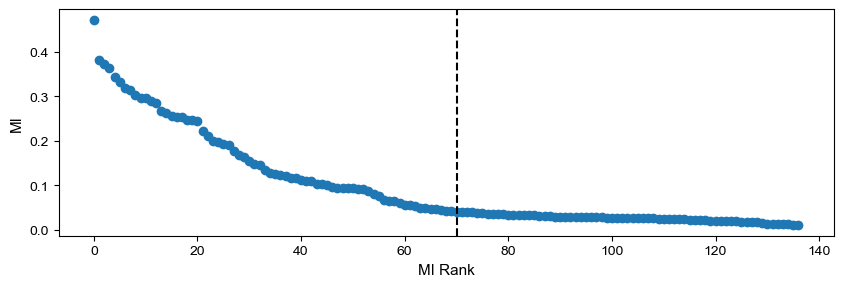

In [15]:
p = Preprocess(14)

p.select_features_MI(adata_ADT, adata_ADT.obs['leiden'], n_top_features = 70,
                     max_scaled_thresh = None, quantile_thresh = .9999, makeplots=True)

(-30.0, 150.0)

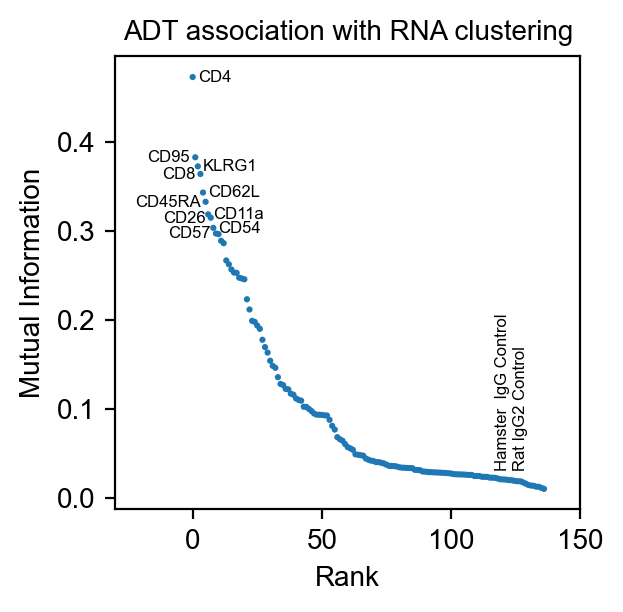

In [16]:
(fig,ax) = plt.subplots(1,1, figsize=(3,3), dpi=200)
MI_info_cluster = adata_ADT.var.sort_values(by='MI_Rank')
MI_info_forplot = MI_info_cluster.copy()
ax.scatter(MI_info_forplot['MI_Rank'], MI_info_forplot['MI'], s=5, edgecolor='None')
ax.set_xlabel('Rank', fontsize=10)
ax.set_ylabel('Mutual Information', fontsize=10)
ax.set_title('ADT association with RNA clustering', fontsize=10)


for i,v in enumerate(MI_info_forplot.index[:10]):
    lab = v.replace('_prot', '').replace('Recombinant', '').split('_')[0]
    if i % 2 == 0:
        ax.text(MI_info_forplot.at[v, 'MI_Rank']+2, MI_info_forplot.at[v, 'MI'], lab, fontsize=6, va='center', ha='left')
    else:
        ax.text(MI_info_forplot.at[v, 'MI_Rank']-2, MI_info_forplot.at[v, 'MI'], lab, fontsize=6, va='center', ha='right')    



for i,v in enumerate(['ArmenianHamsterIgGIsotypeCtrl_prot', 'RatIgG2a_kIsotypeCtrl_prot']):
    lab = v.replace('_prot', '').replace('Armenian', '').replace('IgGIsotypeCtrl', '  IgG Control').replace('IgG2a', ' IgG2 Control').split('_')[0]
    if i == 0:
        ax.text(MI_info_forplot.at[v, 'MI_Rank'], MI_info_forplot.at[v, 'MI']+.01, lab, fontsize=6, va='bottom', ha='center', rotation=90)
    else:
        ax.text(MI_info_forplot.at[v, 'MI_Rank']+5, MI_info_forplot.at[v, 'MI']+.01, lab, fontsize=6, va='bottom', ha='center', rotation=90)


ax.set_xlim([-30, 150])

# AIM association with ADT all T-cells

AnnData object with n_obs × n_vars = 42370 × 137
    obs: 'barcode', 'BRI', 'Run', 'Well', 'Batch', 'Biobank_ID', 'Sort_Status', 'HTO_Status', 'Demuxlet_Assignment', 'Total_RNA_Count', 'Total_ADT_Count', 'Total_HTO_Count', 'frac_ADT', 'A_cdr3', 'B_cdr3', 'DEMUX_RD.UNIQ', 'DEMUX_N.SNP', 'DEMUX_BEST', 'DEMUX_SNG.1ST', 'DEMUX_SNG.LLK1', 'DEMUX_DBL.1ST', 'DEMUX_DBL.2ND', 'DEMUX_LLK12', 'DEMUX_PRB.DBL', 'DEMUX_PRB.SNG1', 'batch_name', 'B_is_cell', 'B_high_confidence', 'B_full_length', 'B_productive', 'B_length', 'B_v_gene', 'B_d_gene', 'B_j_gene', 'B_c_gene', 'B_cdr1', 'B_cdr2', 'B_cdr3_nt', 'B_reads', 'B_umis', 'B_raw_clonotype_id', 'B_raw_consensus_id', 'B_Num_Hits_In_Barcode', 'B_Next_Highest_ReadCount', 'B_Num_Productive_In_Barcode', 'B_Has_Unproductive', 'A_is_cell', 'A_high_confidence', 'A_full_length', 'A_productive', 'A_length', 'A_v_gene', 'A_d_gene', 'A_j_gene', 'A_c_gene', 'A_cdr1', 'A_cdr2', 'A_cdr3_nt', 'A_reads', 'A_umis', 'A_raw_clonotype_id', 'A_raw_consensus_id', 'A_Num_Hit

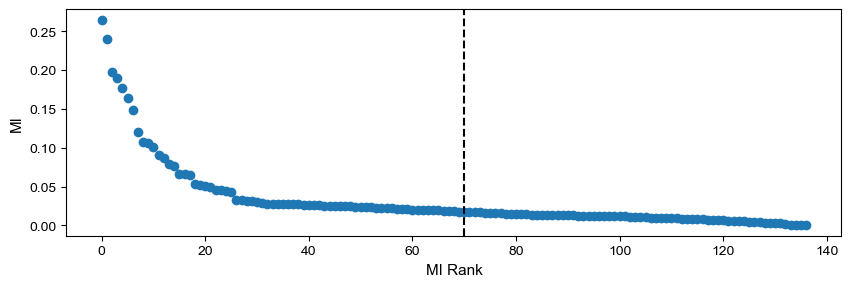

In [17]:
p = Preprocess(14)

adata_ADT.obs['Is_Stim_Positive'] = adata_ADT.obs['Sort_Status'].replace('-', 'U')

p.select_features_MI(adata_ADT, adata_ADT.obs['Is_Stim_Positive'], n_top_features = 70,
                     max_scaled_thresh = None, quantile_thresh = .9999, makeplots=True)

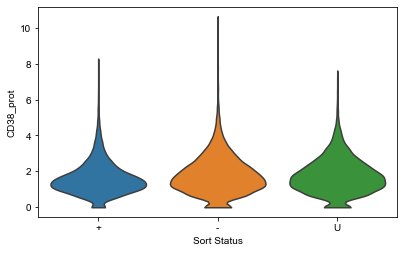

In [18]:
sc.pl.violin(adata_ADT, keys='CD38_prot', groupby='Sort_Status', stripplot=False)

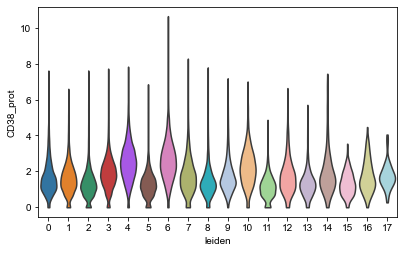

In [19]:
sc.pl.violin(adata_ADT, keys='CD38_prot', groupby='leiden', stripplot=False)

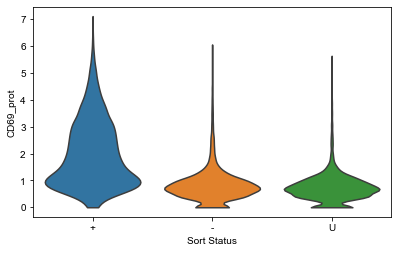

In [20]:
sc.pl.violin(adata_ADT, keys='CD69_prot', groupby='Sort_Status', stripplot=False)

In [21]:
MI_info_aimpos = adata_ADT.var.sort_values(by='MI_Rank')
MI_info_aimpos.head(50)

,gene_sybmol,gene_name,feature_type,mean,std,MI,MI_Rank,MI_diff,highly_variable
gene_sybmol,,,,,,,,,
CD54_prot,CD54_prot,CD54_prot,Antibody Capture,1.702939,1.002982,0.265258,0.0,NaN,True
CD274_or_B7-H1_PD-L1_prot,CD274_or_B7-H1_PD-L1_prot,CD274_or_B7-H1_PD-L1_prot,Antibody Capture,2.890747,1.002453,0.240368,1.0,-0.024891,True
CD25_prot,CD25_prot,CD25_prot,Antibody Capture,1.314769,1.002251,0.198280,2.0,-0.042088,True
CD71_prot,CD71_prot,CD71_prot,Antibody Capture,1.847471,1.002315,0.190328,3.0,-0.007952,True
CD3_prot,CD3_prot,CD3_prot,Antibody Capture,3.263428,0.998695,0.176562,4.0,-0.013766,True
CD69_prot,CD69_prot,CD69_prot,Antibody Capture,1.157220,1.002361,0.163615,5.0,-0.012948,True
CD95_or_Fas_prot,CD95_or_Fas_prot,CD95_or_Fas_prot,Antibody Capture,2.705739,1.002658,0.149193,6.0,-0.014421,True
CD26_prot,CD26_prot,CD26_prot,Antibody Capture,2.352751,1.003801,0.119843,7.0,-0.029351,True
CD57Recombinant_prot,CD57Recombinant_prot,CD57Recombinant_prot,Antibody Capture,3.036018,0.999896,0.107335,8.0,-0.012507,True


In [22]:
MI_info_aimpos.loc['CD38_prot', :]

gene_sybmol               CD38_prot
gene_name                 CD38_prot
feature_type       Antibody Capture
mean                       1.735029
std                        0.998514
MI                         0.009188
MI_Rank                       111.0
MI_diff                   -0.000163
highly_variable               False
Name: CD38_prot, dtype: object

(-25.0, 150.0)

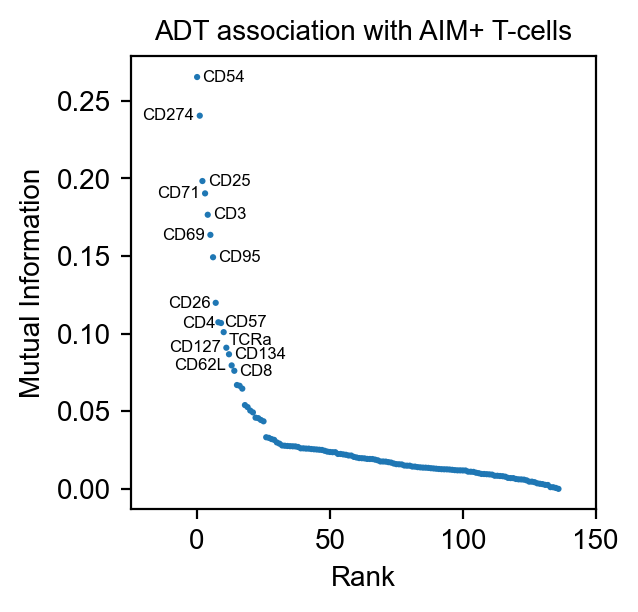

In [23]:
(fig,ax) = plt.subplots(1,1, figsize=(3,3), dpi=200)
MI_info_forplot = MI_info_aimpos.copy()

ax.scatter(MI_info_forplot['MI_Rank'], MI_info_forplot['MI'], s=5, edgecolor='None')
ax.set_xlabel('Rank', fontsize=10)
ax.set_ylabel('Mutual Information', fontsize=10)
ax.set_title('ADT association with AIM+ T-cells', fontsize=10)

toshow = list(MI_info_forplot.index[:15])



for i,v in enumerate(toshow):
    lab = v.replace('_prot', '').replace('Recombinant', '').split('_')[0]
    if v == 'TCRa_or_b_prot':
        ax.text(MI_info_forplot.at[v, 'MI_Rank']+2, MI_info_forplot.at[v, 'MI']-.005, lab, fontsize=6, va='center', ha='left')
    elif i % 2 == 0:
        ax.text(MI_info_forplot.at[v, 'MI_Rank']+2, MI_info_forplot.at[v, 'MI'], lab, fontsize=6, va='center', ha='left')
    else:
        ax.text(MI_info_forplot.at[v, 'MI_Rank']-2, MI_info_forplot.at[v, 'MI'], lab, fontsize=6, va='center', ha='right')    

ax.set_xlim([-25, 150])

In [24]:
adata_ADT

AnnData object with n_obs × n_vars = 42370 × 137
    obs: 'barcode', 'BRI', 'Run', 'Well', 'Batch', 'Biobank_ID', 'Sort_Status', 'HTO_Status', 'Demuxlet_Assignment', 'Total_RNA_Count', 'Total_ADT_Count', 'Total_HTO_Count', 'frac_ADT', 'A_cdr3', 'B_cdr3', 'DEMUX_RD.UNIQ', 'DEMUX_N.SNP', 'DEMUX_BEST', 'DEMUX_SNG.1ST', 'DEMUX_SNG.LLK1', 'DEMUX_DBL.1ST', 'DEMUX_DBL.2ND', 'DEMUX_LLK12', 'DEMUX_PRB.DBL', 'DEMUX_PRB.SNG1', 'batch_name', 'B_is_cell', 'B_high_confidence', 'B_full_length', 'B_productive', 'B_length', 'B_v_gene', 'B_d_gene', 'B_j_gene', 'B_c_gene', 'B_cdr1', 'B_cdr2', 'B_cdr3_nt', 'B_reads', 'B_umis', 'B_raw_clonotype_id', 'B_raw_consensus_id', 'B_Num_Hits_In_Barcode', 'B_Next_Highest_ReadCount', 'B_Num_Productive_In_Barcode', 'B_Has_Unproductive', 'A_is_cell', 'A_high_confidence', 'A_full_length', 'A_productive', 'A_length', 'A_v_gene', 'A_d_gene', 'A_j_gene', 'A_c_gene', 'A_cdr1', 'A_cdr2', 'A_cdr3_nt', 'A_reads', 'A_umis', 'A_raw_clonotype_id', 'A_raw_consensus_id', 'A_Num_Hit

In [25]:
labelfn = '../../../Data/PerDataset/Stimseq/ManualGating.Magic.FinalLabel.20230831.tsv'
gating_label = pd.read_csv(labelfn, sep='\t', index_col=0)['0']
gating_label.head()

3_AAACCTGAGACCGGAT       CD4_CM
3_AAACCTGAGAGGGCTT    CD4_Naive
3_AAACCTGAGAGTCTGG       CD4_EM
3_AAACCTGAGCTAGCCC       CD4_CM
3_AAACCTGAGCTGCCCA       CD4_CM
Name: 0, dtype: object

In [26]:
adata_ADT.obs['lineage'] = gating_label.loc[adata_ADT.obs.index]

In [27]:
adata_ADT.obs['lineage'].value_counts()

CD4_CM       9360
CD4_Naive    8721
CD8_EM       5523
CD8_Naive    4830
CD4_EM       4166
Treg         2070
CD8_TEMRA    1747
gdT          1501
DP           1501
MAIT         1423
CD8_CM       1184
DN            197
CD4_TEMRA     147
Name: lineage, dtype: int64

# AIM association with CD4 conventional T-cells

In [28]:
adata_ADT_CD4Mem = adata_ADT[adata_ADT.obs['lineage'].isin(['CD4_CM', 'CD4_EM', 'CD4_TEMRA', 'CD4_Naive']), :]

/PHShome/dk718/miniforge3/envs/cnmf_env2v3/lib/python3.7/site-packages/ipykernel_launcher.py:3: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  This is separate from the ipykernel package so we can avoid doing imports until


AnnData object with n_obs × n_vars = 22394 × 137
    obs: 'barcode', 'BRI', 'Run', 'Well', 'Batch', 'Biobank_ID', 'Sort_Status', 'HTO_Status', 'Demuxlet_Assignment', 'Total_RNA_Count', 'Total_ADT_Count', 'Total_HTO_Count', 'frac_ADT', 'A_cdr3', 'B_cdr3', 'DEMUX_RD.UNIQ', 'DEMUX_N.SNP', 'DEMUX_BEST', 'DEMUX_SNG.1ST', 'DEMUX_SNG.LLK1', 'DEMUX_DBL.1ST', 'DEMUX_DBL.2ND', 'DEMUX_LLK12', 'DEMUX_PRB.DBL', 'DEMUX_PRB.SNG1', 'batch_name', 'B_is_cell', 'B_high_confidence', 'B_full_length', 'B_productive', 'B_length', 'B_v_gene', 'B_d_gene', 'B_j_gene', 'B_c_gene', 'B_cdr1', 'B_cdr2', 'B_cdr3_nt', 'B_reads', 'B_umis', 'B_raw_clonotype_id', 'B_raw_consensus_id', 'B_Num_Hits_In_Barcode', 'B_Next_Highest_ReadCount', 'B_Num_Productive_In_Barcode', 'B_Has_Unproductive', 'A_is_cell', 'A_high_confidence', 'A_full_length', 'A_productive', 'A_length', 'A_v_gene', 'A_d_gene', 'A_j_gene', 'A_c_gene', 'A_cdr1', 'A_cdr2', 'A_cdr3_nt', 'A_reads', 'A_umis', 'A_raw_clonotype_id', 'A_raw_consensus_id', 'A_Num_Hit

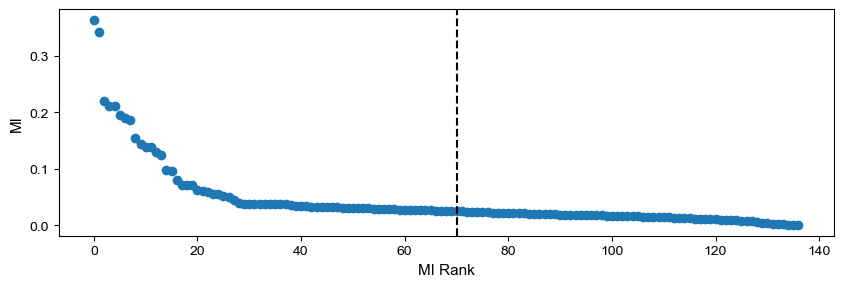

In [29]:
p = Preprocess(14)

adata_ADT_CD4Mem.obs['Is_Stim_Positive'] = adata_ADT_CD4Mem.obs['Sort_Status'].replace('-', 'U')

p.select_features_MI(adata_ADT_CD4Mem, adata_ADT_CD4Mem.obs['Is_Stim_Positive'], n_top_features = 70,
                     max_scaled_thresh = None, quantile_thresh = .9999, makeplots=True)

(-25.0, 150.0)

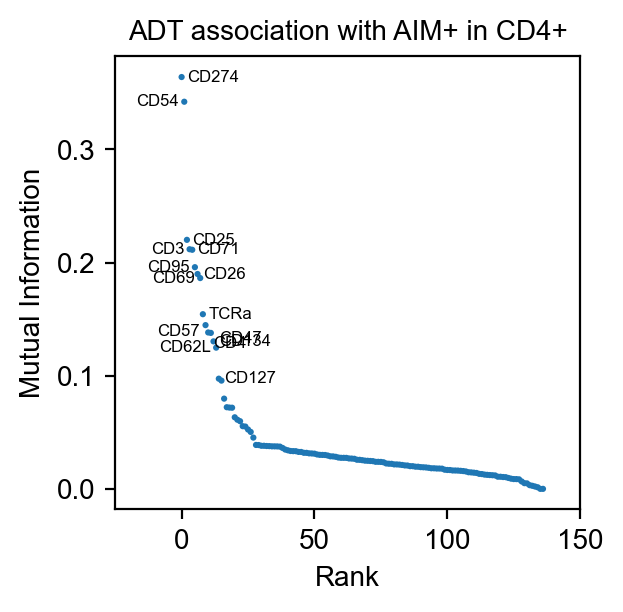

In [30]:
(fig,ax) = plt.subplots(1,1, figsize=(3,3), dpi=200)
MI_info_aimpos_cd4mem = adata_ADT_CD4Mem.var.sort_values(by='MI_Rank')
MI_info_forplot = MI_info_aimpos_cd4mem.copy()

ax.scatter(MI_info_forplot['MI_Rank'], MI_info_forplot['MI'], s=5, edgecolor='None')
ax.set_xlabel('Rank', fontsize=10)
ax.set_ylabel('Mutual Information', fontsize=10)
ax.set_title('ADT association with AIM+ in CD4+', fontsize=10)


for i,v in enumerate(MI_info_forplot.index[:15]):
    lab = v.replace('_prot', '').replace('Recombinant', '').split('_')[0]
    if v == 'CD57Recombinant_prot':
        ax.text(MI_info_forplot.at[v, 'MI_Rank']-2, MI_info_forplot.at[v, 'MI']-.005, lab, fontsize=6, va='center', ha='right')
    elif v == 'CD4_prot':
        ax.text(MI_info_forplot.at[v, 'MI_Rank']+2, MI_info_forplot.at[v, 'MI']-.01, lab, fontsize=6, va='center', ha='left')
    elif v == 'CD47_prot':
        ax.text(MI_info_forplot.at[v, 'MI_Rank']+3, MI_info_forplot.at[v, 'MI']-.005, lab, fontsize=6, va='center', ha='left')
        
    elif i % 2 == 0:
        ax.text(MI_info_forplot.at[v, 'MI_Rank']+2, MI_info_forplot.at[v, 'MI'], lab, fontsize=6, va='center', ha='left')
    else:
        ax.text(MI_info_forplot.at[v, 'MI_Rank']-2, MI_info_forplot.at[v, 'MI'], lab, fontsize=6, va='center', ha='right')    

ax.set_xlim([-25, 150])

Text(0.5, 1.0, 'Example Activation Induced\nMarkers CD4 T-cells')

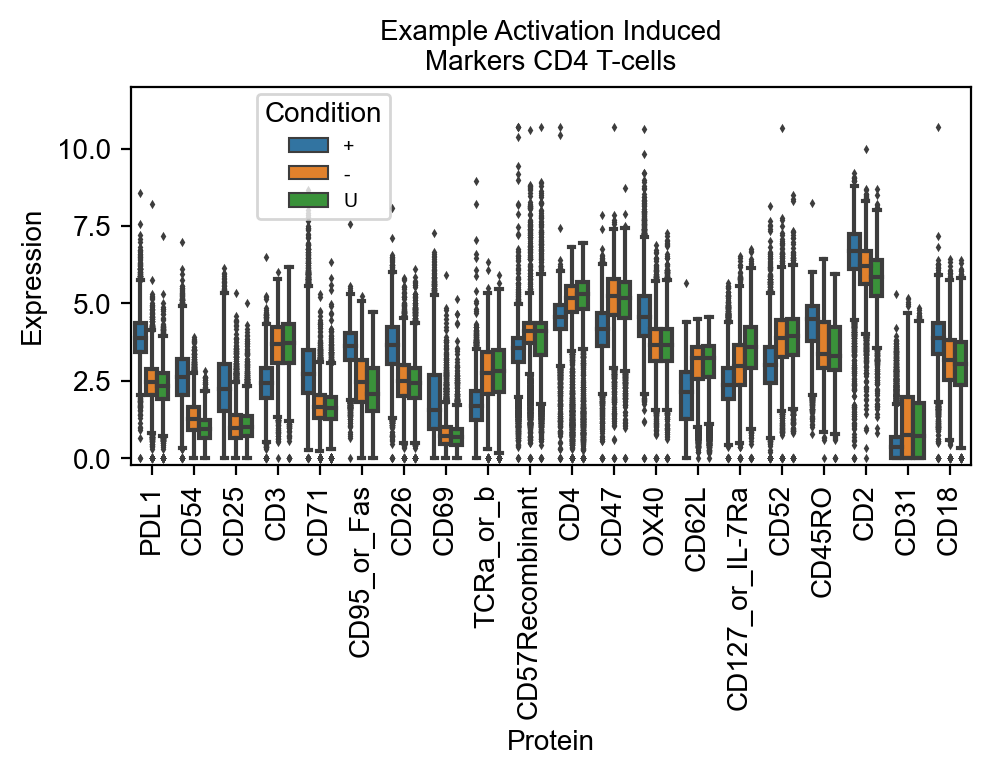

In [31]:
MI_info = MI_info_aimpos_cd4mem.sort_values(by='MI_Rank')
toplot = list(MI_info.index[:20])
X = pd.DataFrame(adata_ADT_CD4Mem[:,toplot].X, columns=toplot, index=adata_ADT_CD4Mem.obs.index)
Xflat = X.unstack().reset_index()
Xflat.columns = ['Protein', 'Barcode', 'Expression']
Xflat = pd.merge(left=Xflat, right=adata_ADT_CD4Mem.obs[['Biobank_ID', 'Sort_Status']], left_on='Barcode', right_index=True, how='left')
(fig,ax) = plt.subplots(1,1, figsize=(6,3), dpi=200, gridspec_kw={'bottom':.25, 'left':.2})
sns.boxplot(x='Protein', y='Expression', hue='Sort_Status', data=Xflat, order=toplot, ax=ax, fliersize=1)
labs = [x.replace('_prot', '').replace('CD274_or_B7-H1_PD-L1', 'PDL1').replace('CD134_or_OX40', 'OX40') for x in toplot]
ax.set_xticklabels(labs, rotation=90)
ax.set_ylabel('Expression', fontsize=10)
ax.set_xlabel('Protein', fontsize=10)
ax.set_ylim([-.2, 12])
ax.legend(loc=(0.15,.65), title='Condition', fontsize=7)
ax.set_title('Example Activation Induced\nMarkers CD4 T-cells', fontsize=10)

In [32]:
cmap = {'M':sns.color_palette('colorblind')[1], '-':sns.color_palette('colorblind')[2], '+':sns.color_palette('colorblind')[3]}


In [84]:
sorted(MI_info_aimpos_cd4mem.index)

['ArmenianHamsterIgGIsotypeCtrl_prot',
 'CD101_or_BB27_prot',
 'CD103_or_IntegrinaE_prot',
 'CD105_prot',
 'CD107a_or_LAMP-1_prot',
 'CD112_or_Nectin-2_prot',
 'CD119_or_IFN-gRachain_prot',
 'CD11a_prot',
 'CD11b_prot',
 'CD11c_prot',
 'CD122_or_IL-2Rb_prot',
 'CD123_prot',
 'CD124_or_IL-4Ra_prot',
 'CD127_or_IL-7Ra_prot',
 'CD134_or_OX40_prot',
 'CD137_or_4-1BB_prot',
 'CD13_prot',
 'CD141_or_Thrombomodulin_prot',
 'CD146_prot',
 'CD14_prot',
 'CD152_or_CTLA-4_prot',
 'CD154_prot',
 'CD155_or_PVR_prot',
 'CD158_or_KIR2DL1_or_S1_or_S3_or_S5_prot',
 'CD158b_or_KIR2DL2_or_L3_NKAT2_prot',
 'CD158e1_or_KIR3DL1_NKB1_prot',
 'CD161_prot',
 'CD163_prot',
 'CD169_or_Sialoadhesin_Siglec-1_prot',
 'CD16_prot',
 'CD183_or_CXCR3_prot',
 'CD185_or_CXCR5_prot',
 'CD18_prot',
 'CD194_or_CCR4_prot',
 'CD195_or_CCR5_prot',
 'CD196_or_CCR6_prot',
 'CD19_prot',
 'CD1c_prot',
 'CD1d_prot',
 'CD20_prot',
 'CD21_prot',
 'CD223_or_LAG-3_prot',
 'CD224_prot',
 'CD226_or_DNAM-1_prot',
 'CD22_prot',
 'CD23_prot

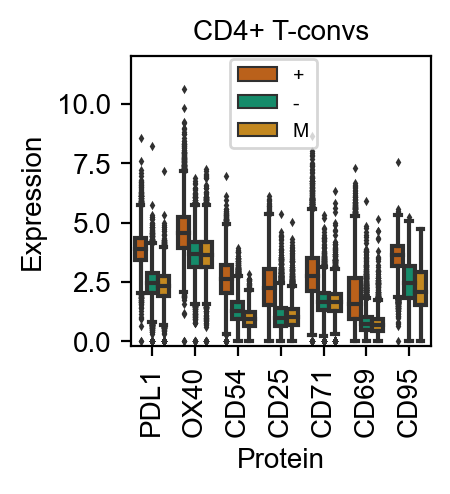

In [86]:
MI_info = MI_info_aimpos_cd4mem.sort_values(by='MI_Rank')
toplot = list(MI_info.index[:5]) + ['CD134_or_OX40_prot']
toplot = ['CD274_or_B7-H1_PD-L1_prot', 'CD134_or_OX40_prot', 'CD54_prot', 'CD25_prot', 'CD71_prot',  'CD69_prot', 'CD95_or_Fas_prot']
X = pd.DataFrame(adata_ADT_CD4Mem[:,toplot].X, columns=toplot, index=adata_ADT_CD4Mem.obs.index)
Xflat = X.unstack().reset_index()
Xflat.columns = ['Protein', 'Barcode', 'Expression']
Xflat = pd.merge(left=Xflat, right=adata_ADT_CD4Mem.obs[['Biobank_ID', 'Sort_Status']], left_on='Barcode', right_index=True, how='left')
Xflat['Sort_Status'] = Xflat['Sort_Status'].replace({'U':'M'})
(fig,ax) = plt.subplots(1,1, figsize=(2.5,2.5), dpi=200, gridspec_kw={'bottom':.3, 'left':.3})
sns.boxplot(x='Protein', y='Expression', hue='Sort_Status', data=Xflat, order=toplot, ax=ax, fliersize=1, palette=cmap)
labs = [x.replace('_prot', '').replace('CD274_or_B7-H1_PD-L1', 'PDL1').replace('CD134_or_OX40', 'OX40').replace('_or_Fas', '') for x in toplot]
ax.set_xticklabels(labs, rotation=90)
ax.set_ylabel('Expression', fontsize=10)
ax.set_xlabel('Protein', fontsize=10)
ax.set_ylim([-.2, 12])
ax.legend(bbox_to_anchor=(.3, .65), fontsize=7)
ax.set_title('CD4+ T-convs', fontsize=10)
plt.savefig(os.path.join(figdir, 'Stimseq_AIM_ADTs.CD4mem.png'))
plt.savefig(os.path.join(figdir, 'Stimseq_AIM_ADTs.CD4mem.pdf'))

In [39]:
X.to_csv('../../../Data/PerDataset/Stimseq/CD4_MarkerPlot_Data.tsv', sep='\t')

In [40]:
from scipy.stats import ttest_ind
for (k,g) in Xflat.groupby('Protein'):
    print(k, ttest_ind(g.loc[g['Sort_Status']=='+', 'Expression'], g.loc[g['Sort_Status']=='-', 'Expression']))



CD134_or_OX40_prot Ttest_indResult(statistic=66.36861731326682, pvalue=0.0)
CD25_prot Ttest_indResult(statistic=87.8387821143785, pvalue=0.0)
CD274_or_B7-H1_PD-L1_prot Ttest_indResult(statistic=126.50351713421743, pvalue=0.0)
CD54_prot Ttest_indResult(statistic=108.77270211419138, pvalue=0.0)
CD69_prot Ttest_indResult(statistic=71.7174979690947, pvalue=0.0)
CD71_prot Ttest_indResult(statistic=82.18605081594045, pvalue=0.0)


# AIM association with CD4 Treg

In [61]:
adata_ADT.obs['lineage'].unique()

array(['CD4_CM', 'CD4_Naive', 'CD4_EM', 'MAIT', 'CD8_CM', 'CD8_EM',
       'Treg', 'gdT', 'CD8_Naive', 'CD8_TEMRA', 'DP', 'DN', 'CD4_TEMRA'],
      dtype=object)

In [62]:
adata_ADT_Treg = adata_ADT[adata_ADT.obs['lineage'].isin(['Treg']), :]

/PHShome/dk718/miniforge3/envs/cnmf_env2v3/lib/python3.7/site-packages/ipykernel_launcher.py:3: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  This is separate from the ipykernel package so we can avoid doing imports until


AnnData object with n_obs × n_vars = 2070 × 137
    obs: 'barcode', 'BRI', 'Run', 'Well', 'Batch', 'Biobank_ID', 'Sort_Status', 'HTO_Status', 'Demuxlet_Assignment', 'Total_RNA_Count', 'Total_ADT_Count', 'Total_HTO_Count', 'frac_ADT', 'A_cdr3', 'B_cdr3', 'DEMUX_RD.UNIQ', 'DEMUX_N.SNP', 'DEMUX_BEST', 'DEMUX_SNG.1ST', 'DEMUX_SNG.LLK1', 'DEMUX_DBL.1ST', 'DEMUX_DBL.2ND', 'DEMUX_LLK12', 'DEMUX_PRB.DBL', 'DEMUX_PRB.SNG1', 'batch_name', 'B_is_cell', 'B_high_confidence', 'B_full_length', 'B_productive', 'B_length', 'B_v_gene', 'B_d_gene', 'B_j_gene', 'B_c_gene', 'B_cdr1', 'B_cdr2', 'B_cdr3_nt', 'B_reads', 'B_umis', 'B_raw_clonotype_id', 'B_raw_consensus_id', 'B_Num_Hits_In_Barcode', 'B_Next_Highest_ReadCount', 'B_Num_Productive_In_Barcode', 'B_Has_Unproductive', 'A_is_cell', 'A_high_confidence', 'A_full_length', 'A_productive', 'A_length', 'A_v_gene', 'A_d_gene', 'A_j_gene', 'A_c_gene', 'A_cdr1', 'A_cdr2', 'A_cdr3_nt', 'A_reads', 'A_umis', 'A_raw_clonotype_id', 'A_raw_consensus_id', 'A_Num_Hits

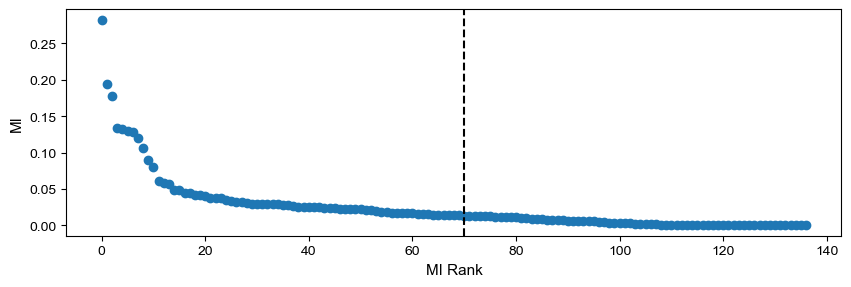

In [63]:
p = Preprocess(14)

adata_ADT_Treg.obs['Is_Stim_Positive'] = adata_ADT_Treg.obs['Sort_Status'].replace('-', 'U')

p.select_features_MI(adata_ADT_Treg, adata_ADT_Treg.obs['Is_Stim_Positive'], n_top_features = 70,
                     max_scaled_thresh = None, quantile_thresh = .9999, makeplots=True)

(-25.0, 150.0)

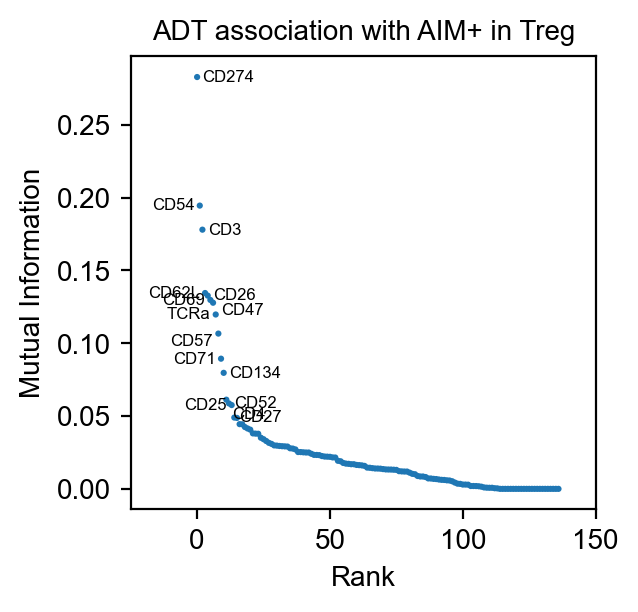

In [64]:
(fig,ax) = plt.subplots(1,1, figsize=(3,3), dpi=200)
MI_info_aimpos_treg = adata_ADT_Treg.var.sort_values(by='MI_Rank')
MI_info_forplot = MI_info_aimpos_treg.copy()

ax.scatter(MI_info_forplot['MI_Rank'], MI_info_forplot['MI'], s=5, edgecolor='None')
ax.set_xlabel('Rank', fontsize=10)
ax.set_ylabel('Mutual Information', fontsize=10)
ax.set_title('ADT association with AIM+ in Treg', fontsize=10)


for i,v in enumerate(MI_info_forplot.index[:15]):
    lab = v.replace('_prot', '').replace('Recombinant', '').split('_')[0]
    if v == 'CD57Recombinant_prot':
        ax.text(MI_info_forplot.at[v, 'MI_Rank']-2, MI_info_forplot.at[v, 'MI']-.005, lab, fontsize=6, va='center', ha='right')
    elif v == 'CD4_prot':
        ax.text(MI_info_forplot.at[v, 'MI_Rank']+2, MI_info_forplot.at[v, 'MI']-.01, lab, fontsize=6, va='center', ha='left')
    elif v == 'CD47_prot':
        ax.text(MI_info_forplot.at[v, 'MI_Rank']+3, MI_info_forplot.at[v, 'MI']-.005, lab, fontsize=6, va='center', ha='left')
        
    elif i % 2 == 0:
        ax.text(MI_info_forplot.at[v, 'MI_Rank']+2, MI_info_forplot.at[v, 'MI'], lab, fontsize=6, va='center', ha='left')
    else:
        ax.text(MI_info_forplot.at[v, 'MI_Rank']-2, MI_info_forplot.at[v, 'MI'], lab, fontsize=6, va='center', ha='right')    

ax.set_xlim([-25, 150])

Text(0.5, 1.0, 'Example Activation Induced\nMarkers CD4 T-cells')

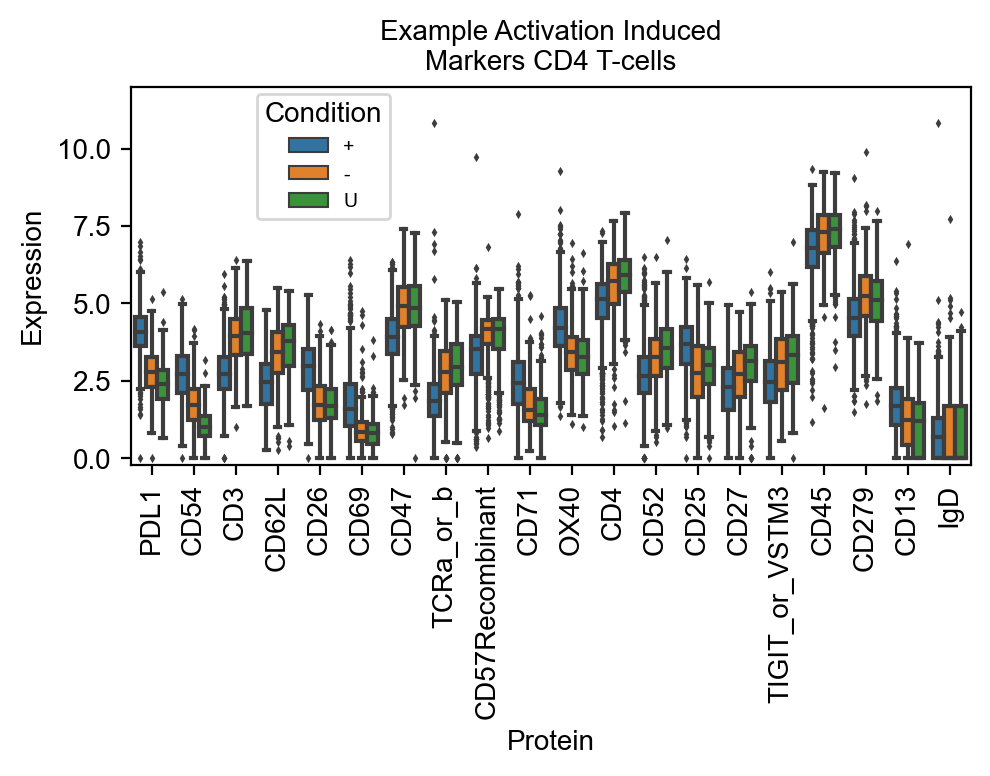

In [65]:
MI_info = MI_info_aimpos_treg.sort_values(by='MI_Rank')
toplot = list(MI_info.index[:20])
X = pd.DataFrame(adata_ADT_Treg[:,toplot].X, columns=toplot, index=adata_ADT_Treg.obs.index)
Xflat = X.unstack().reset_index()
Xflat.columns = ['Protein', 'Barcode', 'Expression']
Xflat = pd.merge(left=Xflat, right=adata_ADT_Treg.obs[['Biobank_ID', 'Sort_Status']], left_on='Barcode', right_index=True, how='left')
(fig,ax) = plt.subplots(1,1, figsize=(6,3), dpi=200, gridspec_kw={'bottom':.25, 'left':.2})
sns.boxplot(x='Protein', y='Expression', hue='Sort_Status', data=Xflat, order=toplot, ax=ax, fliersize=1)
labs = [x.replace('_prot', '').replace('CD274_or_B7-H1_PD-L1', 'PDL1').replace('CD134_or_OX40', 'OX40') for x in toplot]
ax.set_xticklabels(labs, rotation=90)
ax.set_ylabel('Expression', fontsize=10)
ax.set_xlabel('Protein', fontsize=10)
ax.set_ylim([-.2, 12])
ax.legend(loc=(0.15,.65), title='Condition', fontsize=7)
ax.set_title('Example Activation Induced\nMarkers CD4 T-cells', fontsize=10)

In [66]:
cmap = {'M':sns.color_palette('colorblind')[1], '-':sns.color_palette('colorblind')[2], '+':sns.color_palette('colorblind')[3]}


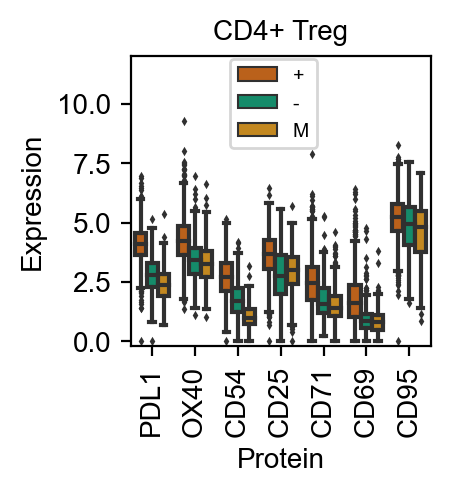

In [88]:
MI_info = MI_info_aimpos_treg.sort_values(by='MI_Rank')
toplot = list(MI_info.index[:5]) + ['CD134_or_OX40_prot']
toplot = ['CD274_or_B7-H1_PD-L1_prot', 'CD134_or_OX40_prot', 'CD54_prot', 'CD25_prot', 'CD71_prot',  'CD69_prot', 'CD95_or_Fas_prot']
X = pd.DataFrame(adata_ADT_Treg[:,toplot].X, columns=toplot, index=adata_ADT_Treg.obs.index)
Xflat = X.unstack().reset_index()
Xflat.columns = ['Protein', 'Barcode', 'Expression']
Xflat = pd.merge(left=Xflat, right=adata_ADT_Treg.obs[['Biobank_ID', 'Sort_Status']], left_on='Barcode', right_index=True, how='left')
Xflat['Sort_Status'] = Xflat['Sort_Status'].replace({'U':'M'})
(fig,ax) = plt.subplots(1,1, figsize=(2.5,2.5), dpi=200, gridspec_kw={'bottom':.3, 'left':.3})
sns.boxplot(x='Protein', y='Expression', hue='Sort_Status', data=Xflat, order=toplot, ax=ax, fliersize=1, palette=cmap)
labs = [x.replace('_prot', '').replace('CD274_or_B7-H1_PD-L1', 'PDL1').replace('CD134_or_OX40', 'OX40').replace('_or_Fas', '') for x in toplot]
ax.set_xticklabels(labs, rotation=90)
ax.set_ylabel('Expression', fontsize=10)
ax.set_xlabel('Protein', fontsize=10)
ax.set_ylim([-.2, 12])
ax.legend(bbox_to_anchor=(.3, .65), fontsize=7)
ax.set_title('CD4+ Treg', fontsize=10)
plt.savefig(os.path.join(figdir, 'Stimseq_AIM_ADTs.Treg.png'))
plt.savefig(os.path.join(figdir, 'Stimseq_AIM_ADTs.Treg.pdf'))

In [89]:
X.to_csv('../../../Data/PerDataset/Stimseq/CD4_Treg_MarkerPlot_Data.tsv', sep='\t')

In [90]:
from scipy.stats import ttest_ind
for (k,g) in Xflat.groupby('Protein'):
    print(k, ttest_ind(g.loc[g['Sort_Status']=='+', 'Expression'], g.loc[g['Sort_Status']=='-', 'Expression']))



CD134_or_OX40_prot Ttest_indResult(statistic=13.913703613227188, pvalue=7.116742706836324e-42)
CD25_prot Ttest_indResult(statistic=14.061897319244068, pvalue=1.087014040363123e-42)
CD274_or_B7-H1_PD-L1_prot Ttest_indResult(statistic=28.22123491168924, pvalue=2.2303816245190805e-145)
CD54_prot Ttest_indResult(statistic=17.968390537899083, pvalue=1.5854540620481923e-66)
CD69_prot Ttest_indResult(statistic=14.137544795675087, pvalue=4.1403149303149895e-43)
CD71_prot Ttest_indResult(statistic=12.620326777688277, pvalue=4.755252803113165e-35)
CD95_or_Fas_prot Ttest_indResult(statistic=5.8446567202742, pvalue=6.013339345330008e-09)


# AIM association with CD8 conventional T-cells

In [91]:
adata_ADT_CD8Mem = adata_ADT[adata_ADT.obs['lineage'].isin(['CD8_CM', 'CD8_EM', 'CD8_TEMRA', 'CD8_Naive']), :]

/PHShome/dk718/miniforge3/envs/cnmf_env2v3/lib/python3.7/site-packages/ipykernel_launcher.py:3: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  This is separate from the ipykernel package so we can avoid doing imports until


AnnData object with n_obs × n_vars = 13284 × 137
    obs: 'barcode', 'BRI', 'Run', 'Well', 'Batch', 'Biobank_ID', 'Sort_Status', 'HTO_Status', 'Demuxlet_Assignment', 'Total_RNA_Count', 'Total_ADT_Count', 'Total_HTO_Count', 'frac_ADT', 'A_cdr3', 'B_cdr3', 'DEMUX_RD.UNIQ', 'DEMUX_N.SNP', 'DEMUX_BEST', 'DEMUX_SNG.1ST', 'DEMUX_SNG.LLK1', 'DEMUX_DBL.1ST', 'DEMUX_DBL.2ND', 'DEMUX_LLK12', 'DEMUX_PRB.DBL', 'DEMUX_PRB.SNG1', 'batch_name', 'B_is_cell', 'B_high_confidence', 'B_full_length', 'B_productive', 'B_length', 'B_v_gene', 'B_d_gene', 'B_j_gene', 'B_c_gene', 'B_cdr1', 'B_cdr2', 'B_cdr3_nt', 'B_reads', 'B_umis', 'B_raw_clonotype_id', 'B_raw_consensus_id', 'B_Num_Hits_In_Barcode', 'B_Next_Highest_ReadCount', 'B_Num_Productive_In_Barcode', 'B_Has_Unproductive', 'A_is_cell', 'A_high_confidence', 'A_full_length', 'A_productive', 'A_length', 'A_v_gene', 'A_d_gene', 'A_j_gene', 'A_c_gene', 'A_cdr1', 'A_cdr2', 'A_cdr3_nt', 'A_reads', 'A_umis', 'A_raw_clonotype_id', 'A_raw_consensus_id', 'A_Num_Hit

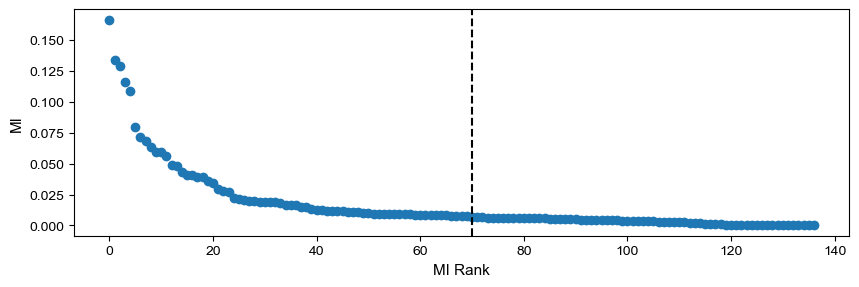

In [92]:
p = Preprocess(14)

adata_ADT_CD8Mem.obs['Is_Stim_Positive'] = adata_ADT_CD8Mem.obs['Sort_Status'].replace('-', 'U')

p.select_features_MI(adata_ADT_CD8Mem, adata_ADT_CD8Mem.obs['Is_Stim_Positive'], n_top_features = 70,
                     max_scaled_thresh = None, quantile_thresh = .9999, makeplots=True)

(-25.0, 150.0)

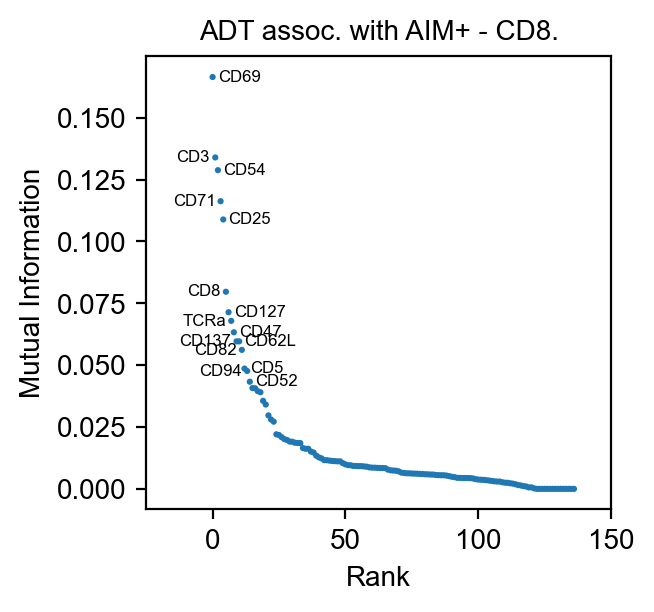

In [93]:
(fig,ax) = plt.subplots(1,1, figsize=(3,3), dpi=200)
MI_info_aimpos_cd8mem = adata_ADT_CD8Mem.var.sort_values(by='MI_Rank')
MI_info_forplot = MI_info_aimpos_cd8mem.copy()

ax.scatter(MI_info_forplot['MI_Rank'], MI_info_forplot['MI'], s=5, edgecolor='None')
ax.set_xlabel('Rank', fontsize=10)
ax.set_ylabel('Mutual Information', fontsize=10)
ax.set_title('ADT assoc. with AIM+ - CD8.', fontsize=10)


for i,v in enumerate(MI_info_forplot.index[:15]):
    lab = v.replace('_prot', '').replace('Recombinant', '').split('_')[0]
    if i % 2 == 0:
        ax.text(MI_info_forplot.at[v, 'MI_Rank']+2, MI_info_forplot.at[v, 'MI'], lab, fontsize=6, va='center', ha='left')
    else:
        ax.text(MI_info_forplot.at[v, 'MI_Rank']-2, MI_info_forplot.at[v, 'MI'], lab, fontsize=6, va='center', ha='right')    

ax.set_xlim([-25, 150])

Text(0.5, 1.0, 'AIM - CD8')

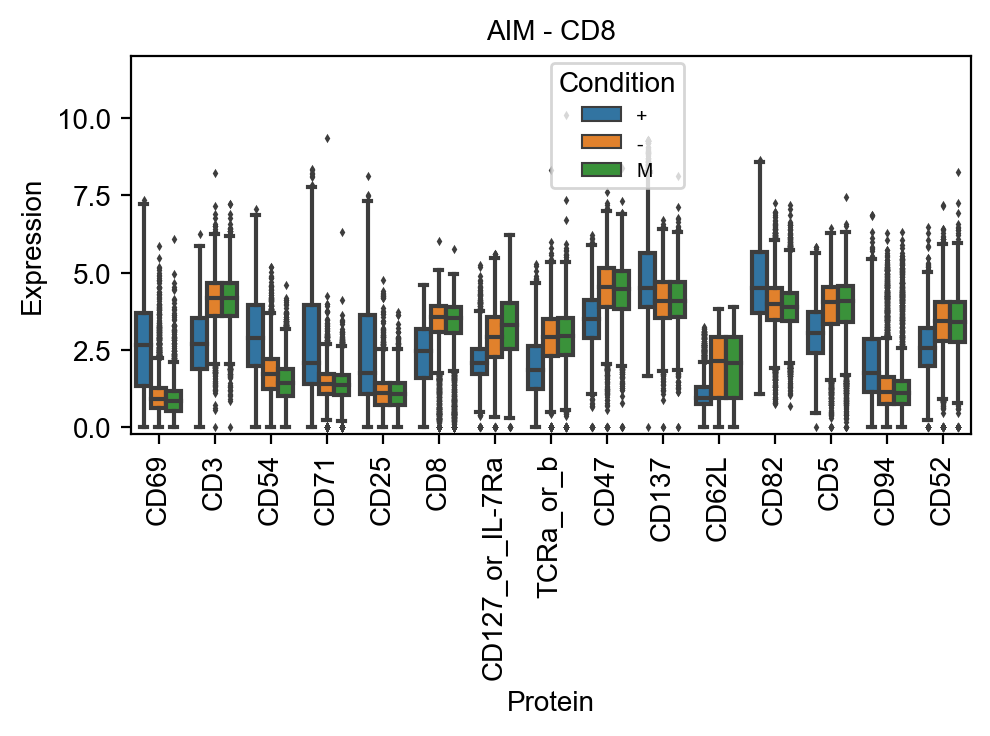

In [94]:
MI_info = adata_ADT_CD8Mem.var.sort_values(by='MI_Rank')
toplot = list(MI_info.index[:15]) 
X = pd.DataFrame(adata_ADT_CD8Mem[:,toplot].X, columns=toplot, index=adata_ADT_CD8Mem.obs.index)
Xflat = X.unstack().reset_index()
Xflat.columns = ['Protein', 'Barcode', 'Expression']
Xflat = pd.merge(left=Xflat, right=adata_ADT_CD8Mem.obs[['Biobank_ID', 'Sort_Status']], left_on='Barcode', right_index=True, how='left')
Xflat['Sort_Status'] = Xflat['Sort_Status'].replace({'U':'M'})

(fig,ax) = plt.subplots(1,1, figsize=(6,3), dpi=200, gridspec_kw={'bottom':.25, 'left':.2})
sns.boxplot(x='Protein', y='Expression', hue='Sort_Status', data=Xflat, order=toplot, ax=ax, fliersize=1)
labs = [x.replace('_prot', '').replace('CD137_or_4-1BB', 'CD137').replace('CD134_or_OX40', 'OX40') for x in toplot]
ax.set_xticklabels(labs, rotation=90)
ax.set_ylabel('Expression', fontsize=10)
ax.set_xlabel('Protein', fontsize=10)
ax.set_ylim([-.2, 12])
ax.legend(loc=(0.5,.65), title='Condition', fontsize=7)
ax.set_title('AIM - CD8', fontsize=10)

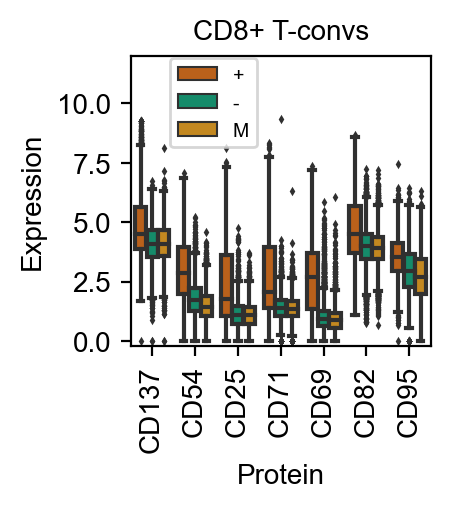

In [99]:
MI_info = adata_ADT_CD8Mem.var.sort_values(by='MI_Rank')
toplot = list(MI_info.index[:5]) + ['CD137_or_4-1BB_prot']
toplot = ['CD137_or_4-1BB_prot', 'CD54_prot', 'CD25_prot', 'CD71_prot',  'CD69_prot', 'CD82_prot', 'CD95_or_Fas_prot']

X = pd.DataFrame(adata_ADT_CD8Mem[:,toplot].X, columns=toplot, index=adata_ADT_CD8Mem.obs.index)
Xflat = X.unstack().reset_index()
Xflat.columns = ['Protein', 'Barcode', 'Expression']
Xflat = pd.merge(left=Xflat, right=adata_ADT_CD8Mem.obs[['Biobank_ID', 'Sort_Status']], left_on='Barcode', right_index=True, how='left')
Xflat['Sort_Status'] = Xflat['Sort_Status'].replace({'U':'M'})

(fig,ax) = plt.subplots(1,1, figsize=(2.5,2.5), dpi=200, gridspec_kw={'bottom':.3, 'left':.3})
sns.boxplot(x='Protein', y='Expression', hue='Sort_Status', data=Xflat, order=toplot, ax=ax, fliersize=1,  palette=cmap)
labs = [x.replace('_prot', '').replace('CD137_or_4-1BB', 'CD137').replace('CD134_or_OX40', 'OX40').replace('_or_Fas', '') for x in toplot]
ax.set_xticklabels(labs, rotation=90)
ax.set_ylabel('Expression', fontsize=10)
ax.set_xlabel('Protein', fontsize=10)
ax.set_ylim([-.2, 12])
ax.legend(bbox_to_anchor=(.1, .65), fontsize=7)
ax.set_title('CD8+ T-convs', fontsize=10)
plt.savefig(os.path.join(figdir, 'Stimseq_AIM_ADTs.CD8mem.png'))
plt.savefig(os.path.join(figdir, 'Stimseq_AIM_ADTs.CD8mem.pdf'))

In [100]:
X.to_csv('../../../Data/PerDataset/Stimseq/CD8_MarkerPlot_Data.tsv', sep='\t')

In [101]:
X.head(20)

,CD137_or_4-1BB_prot,CD54_prot,CD25_prot,CD71_prot,CD69_prot,CD82_prot,CD95_or_Fas_prot
3_AAACCTGCACAAGACG,3.738390,1.383764,1.218224,1.790790,0.992138,5.238090,4.069364
3_AAACCTGCAGGATTGG,4.995154,2.227570,1.342177,1.467418,1.093087,5.149552,1.846181
3_AAACCTGCATGAACCT,3.789504,2.894258,1.873944,0.329790,0.594963,3.838163,4.142833
3_AAACCTGCATTGCGGC,5.125584,1.057597,1.146060,1.549526,1.254499,4.097480,3.126188
3_AAACCTGTCCTTTACA,5.077946,1.999130,1.209421,1.002431,0.396229,4.198328,3.451471
3_AAACCTGTCTTTACGT,4.412002,1.436798,0.512005,1.692470,1.029237,4.068223,1.317855
3_AAACGGGAGCAGCCTC,4.609204,3.634405,1.887930,1.138934,0.723058,3.511996,4.742947
3_AAACGGGAGGCTCTTA,4.360957,2.071575,1.279262,0.777937,0.427828,5.883986,3.399219
3_AAACGGGCAAAGGCGT,4.746933,1.802871,0.681884,1.333429,0.974022,5.525984,2.740680
3_AAACGGGCAACAACCT,3.434623,2.107908,1.767547,1.293890,0.872528,3.397644,5.009405


In [102]:
from scipy.stats import ttest_ind
for (k,g) in Xflat.groupby('Protein'):
    print(k, ttest_ind(g.loc[g['Sort_Status']=='+', 'Expression'], g.loc[g['Sort_Status']=='-', 'Expression']))



CD137_or_4-1BB_prot Ttest_indResult(statistic=30.377934231375885, pvalue=4.117643942955202e-192)
CD25_prot Ttest_indResult(statistic=50.56035031306048, pvalue=0.0)
CD54_prot Ttest_indResult(statistic=52.76496158682479, pvalue=0.0)
CD69_prot Ttest_indResult(statistic=70.24438019277832, pvalue=0.0)
CD71_prot Ttest_indResult(statistic=52.64682269404715, pvalue=0.0)
CD82_prot Ttest_indResult(statistic=28.040567537992995, pvalue=3.0331974342218186e-165)
CD95_or_Fas_prot Ttest_indResult(statistic=24.566436544898753, pvalue=1.2683878033163764e-128)


## Train condition classifier

In [234]:
from sklearn.neighbors import KNeighborsClassifier

In [235]:
features = MI_info_aimpos.index[:20]

In [236]:
X = pd.DataFrame(adata_ADT[:,features].X, index=adata_ADT.obs.index, columns=features)

In [237]:
kmod = KNeighborsClassifier(n_neighbors=10,  weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)
kmod.fit(X, adata_ADT.obs['Sort_Status'])

KNeighborsClassifier(n_neighbors=10)

In [238]:
prediction = kmod.predict(X)

In [239]:
ct = pd.crosstab(prediction, adata_ADT.obs['Sort_Status'])
ct

Sort_Status,+,-,U
row_0,,,
+,11622,766,207
-,786,11540,5275
U,335,3063,8776


In [240]:
ct.div(ct.sum(axis=0), axis=1)

Sort_Status,+,-,U
row_0,,,
+,0.912030,0.049841,0.014518
-,0.061681,0.750862,0.369968
U,0.026289,0.199297,0.615514


In [241]:
merge = pd.concat([adata_ADT.obs['Sort_Status'], pd.Series(prediction, index=adata_ADT.obs.index),
          X[['CD4_prot', 'CD8_prot', 'CD69_prot', 'CD25_prot', 'CD54_prot', 'CD71_prot',
             'CD134_or_OX40_prot', 'CD274_or_B7-H1_PD-L1_prot']]], axis=1)
merge.head()

,Sort_Status,0,CD4_prot,CD8_prot,CD69_prot,CD25_prot,CD54_prot,CD71_prot,CD134_or_OX40_prot,CD274_or_B7-H1_PD-L1_prot
3_AAACCTGAGACCGGAT,+,+,2.430135,0.438474,1.823952,1.871504,2.334716,2.419478,4.594400,3.077496
3_AAACCTGAGAGGGCTT,U,U,3.100245,0.858717,1.101813,0.898091,1.705355,1.049842,2.440843,2.358452
3_AAACCTGAGAGTCTGG,+,+,2.398839,0.765289,3.737149,2.765775,4.937952,4.068122,5.661425,5.235384
3_AAACCTGAGCTAGCCC,U,U,2.746898,0.499135,1.399084,0.693105,0.720963,1.944165,3.681041,1.908728
3_AAACCTGAGCTGCCCA,+,+,2.320214,0.153394,3.496096,1.086067,2.435517,2.229935,6.281795,4.797945


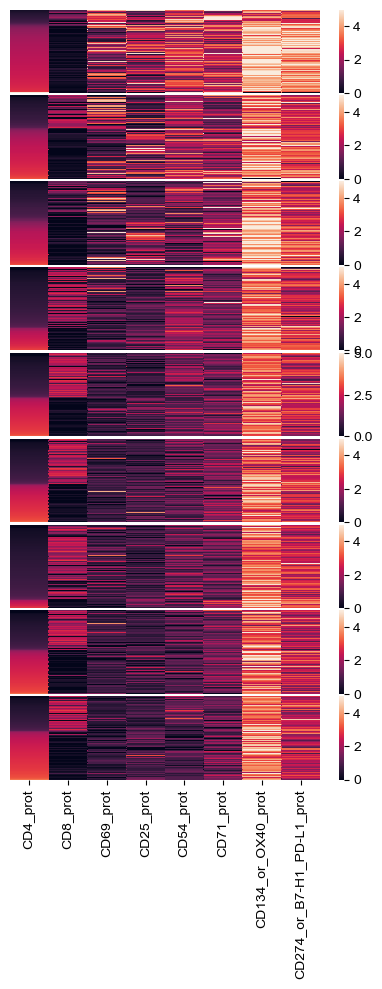

In [242]:
import matplotlib.gridspec as gridspec

gs = gridspec.GridSpec(nrows=9, ncols=1, height_ratios=[1]*9, hspace=.03)

fig, axs = plt.subplots(nrows=9, ncols=1, figsize=(5, 10))

# Iterate over the GridSpec and create subplots
row = 0
for pval in ['+', '-', 'U']:
    for sortv in ['+', '-', 'U']:
        ax = plt.subplot(gs[row, 0])
        ax.set_xticks([])
        ax.set_yticks([])
        ind = (merge['Sort_Status'] == sortv) & (merge[0] == pval)
        subdata = merge.loc[ind, :].sort_values(by='CD4_prot')
        if row == 8:
            sns.heatmap(subdata.iloc[:,2:], ax=ax, vmax=5, yticklabels=False)
        else:
            sns.heatmap(subdata.iloc[:,2:], ax=ax, vmax=5, yticklabels=False, xticklabels=False)
        row+=1

In [213]:
subdata.iloc[:,2:]

,CD4_prot,CD8_prot,CD69_prot,CD25_prot,CD54_prot,CD71_prot,Condition
1_CGTCCATAGGGTCGAT,0.000000,0.556148,1.461372,1.242484,2.340425,1.452428,+_+
1_TCTCTAATCACAAACC,0.000000,1.656261,0.000000,0.644746,1.107637,2.963392,+_+
3_AATCCAGAGCGTTTAC,0.000000,2.477625,0.998961,3.484950,1.747354,2.823502,+_+
1_GCAGCCAAGGAGTTTA,0.000000,1.774949,3.136983,1.669664,2.946073,2.124680,+_+
2_GACTACACAGCGAACA,0.000000,0.502325,0.804648,0.500431,2.453830,1.198701,+_+
...,...,...,...,...,...,...,...
3_GCATGATGTCATACTG,3.247663,0.000000,0.517355,1.761959,1.427899,1.891872,+_+
3_CTACGTCAGTTAAGTG,3.781027,1.494753,0.000000,2.850363,3.240951,2.944158,+_+
1_AGCGGTCGTTTACTCT,3.840657,2.769528,3.553558,0.000000,4.000374,0.000000,+_+
3_ACGAGGAAGCTATGCT,5.297687,0.246464,0.888452,3.013911,2.932528,2.101792,+_+


<AxesSubplot:xlabel='Condition', ylabel='CD69_prot'>

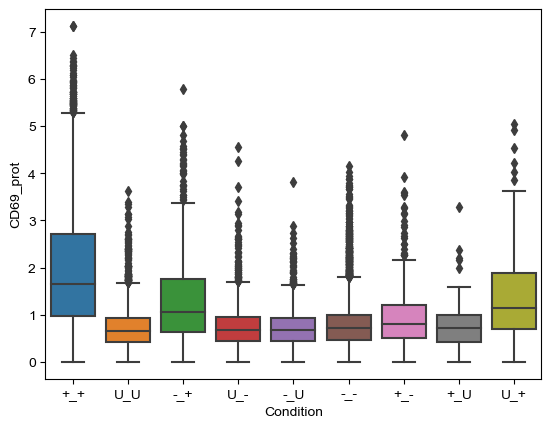

In [190]:
merge['Condition'] = merge['Sort_Status'].astype(str) + '_' + merge[0].astype(str)
ind = merge['CD4_prot']>merge['CD8_prot']
sns.boxplot(x='Condition', y='CD69_prot', data=merge.loc[ind,:])

<AxesSubplot:xlabel='Condition', ylabel='CD25_prot'>

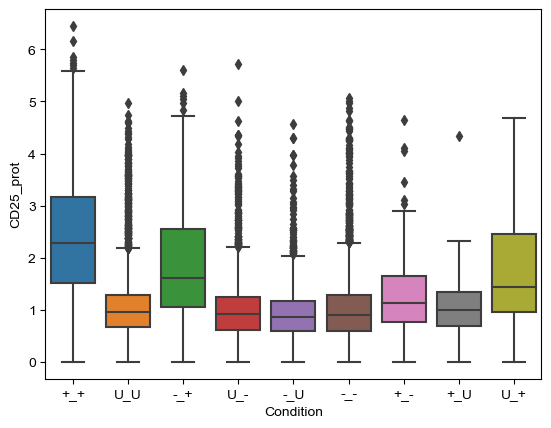

In [191]:
sns.boxplot(x='Condition', y='CD25_prot', data=merge.loc[ind,:])

In [180]:
ind = merge['CD4_prot'] > merge['CD8_prot']
merge.loc[ind, :].groupby(['Sort_Status', 0]).mean()

,,CD4_prot,CD8_prot,CD69_prot,CD25_prot,CD54_prot,CD71_prot
Sort_Status,0,,,,,,
+,+,2.190392,0.209549,1.930586,2.378782,2.811153,2.766754
-,+,2.167974,0.197907,1.371584,1.871771,2.210812,2.059265
U,+,2.003189,0.172591,1.438967,1.743665,1.379476,2.216877
+,-,1.990295,0.181006,0.980306,1.255292,1.751199,1.708885
-,-,2.467902,0.208902,0.779332,0.995617,1.431301,1.548279
U,-,2.486352,0.206913,0.716977,0.999383,1.156733,1.520278
+,U,1.561893,0.172051,0.806528,1.084408,1.306986,1.570223
-,U,2.464468,0.208607,0.695711,0.925265,1.046750,1.462636
U,U,2.553219,0.205481,0.684958,1.025841,0.919376,1.503985


<AxesSubplot:>

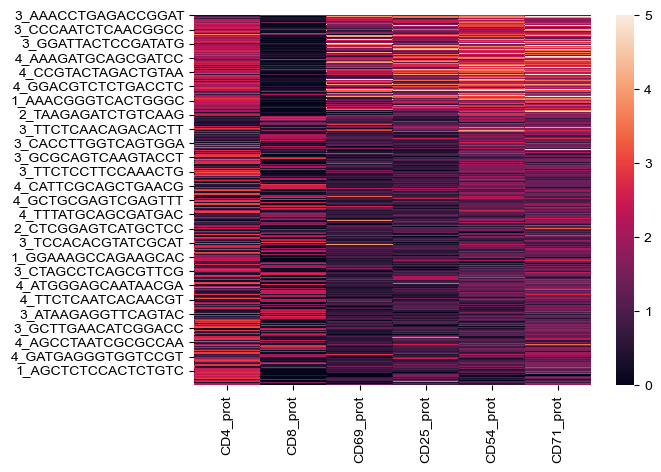

In [182]:
sns.heatmap(merge.sort_values(by=['Sort_Status', 0]).iloc[:, 2:], vmax=5)

In [167]:
X[['CD4_prot', 'CD8_prot', 'CD69_prot', 'CD25_prot']]

gene_sybmol,CD4_prot,CD8_prot,CD69_prot,CD25_prot
3_AAACCTGAGACCGGAT,2.430135,0.438474,1.823952,1.871504
3_AAACCTGAGAGGGCTT,3.100245,0.858717,1.101813,0.898091
3_AAACCTGAGAGTCTGG,2.398839,0.765289,3.737149,2.765775
3_AAACCTGAGCTAGCCC,2.746898,0.499135,1.399084,0.693105
3_AAACCTGAGCTGCCCA,2.320214,0.153394,3.496096,1.086067
...,...,...,...,...
2_TTTGTCATCAGGCCCA,2.453553,0.000000,0.432225,1.089248
2_TTTGTCATCATATCGG,2.147046,0.000000,3.964477,0.882733
2_TTTGTCATCATTATCC,0.828798,2.215891,0.000000,0.890384
2_TTTGTCATCGGCTACG,2.374356,0.000000,1.325836,0.907142


## Scratch

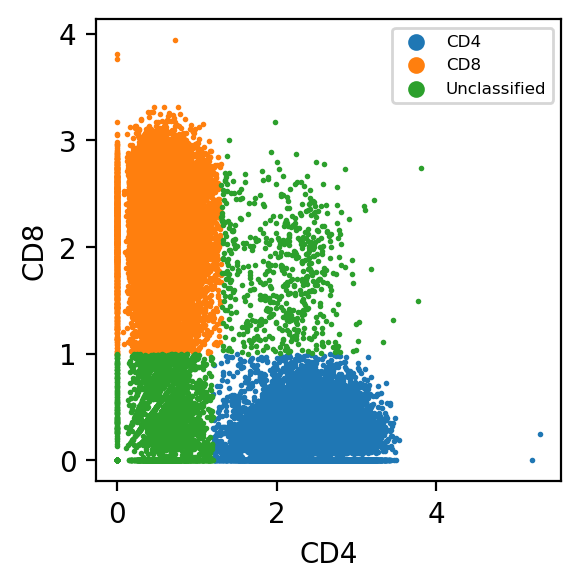

In [84]:
(fig,ax) = plt.subplots(1,1, figsize=(3,3), dpi=200)
cd4 = pd.Series(adata_ADT.obs_vector('CD4_prot'), index=adata_ADT.obs.index)
cd8 = pd.Series(adata_ADT.obs_vector('CD8_prot'), index=adata_ADT.obs.index)

label = pd.Series('Unclassified', index=adata_ADT.obs.index)

ind = (cd4>1.2)  & (cd8<1.)
label.loc[ind] = 'CD4'

ind = (cd4<1.3)  & (cd8>1)
label.loc[ind] = 'CD8'
label_df = pd.concat([label, cd4, cd8], axis=1)
label_df.columns = ['Label', 'CD4', 'CD8']

for (k,g) in label_df.groupby('Label'):
    ax.scatter(g['CD4'],g['CD8'], s=1, label=k)

ax.set_xlabel('CD4')
ax.set_ylabel('CD8')

ax.legend(loc='upper right', markerscale=5, fontsize=6)

In [87]:
adata_ADT_CD4 = adata_ADT[label=='CD4', :]
adata_ADT_CD8 = adata_ADT[label=='CD8', :]

AnnData object with n_obs × n_vars = 24176 × 137
    obs: 'barcode', 'BRI', 'Run', 'Well', 'Batch', 'Biobank_ID', 'Sort_Status', 'HTO_Status', 'Demuxlet_Assignment', 'Total_RNA_Count', 'Total_ADT_Count', 'Total_HTO_Count', 'frac_ADT', 'A_cdr3', 'B_cdr3', 'DEMUX_RD.UNIQ', 'DEMUX_N.SNP', 'DEMUX_BEST', 'DEMUX_SNG.1ST', 'DEMUX_SNG.LLK1', 'DEMUX_DBL.1ST', 'DEMUX_DBL.2ND', 'DEMUX_LLK12', 'DEMUX_PRB.DBL', 'DEMUX_PRB.SNG1', 'batch_name', 'B_is_cell', 'B_high_confidence', 'B_full_length', 'B_productive', 'B_length', 'B_v_gene', 'B_d_gene', 'B_j_gene', 'B_c_gene', 'B_cdr1', 'B_cdr2', 'B_cdr3_nt', 'B_reads', 'B_umis', 'B_raw_clonotype_id', 'B_raw_consensus_id', 'B_Num_Hits_In_Barcode', 'B_Next_Highest_ReadCount', 'B_Num_Productive_In_Barcode', 'B_Has_Unproductive', 'A_is_cell', 'A_high_confidence', 'A_full_length', 'A_productive', 'A_length', 'A_v_gene', 'A_d_gene', 'A_j_gene', 'A_c_gene', 'A_cdr1', 'A_cdr2', 'A_cdr3_nt', 'A_reads', 'A_umis', 'A_raw_clonotype_id', 'A_raw_consensus_id', 'A_Num_Hit

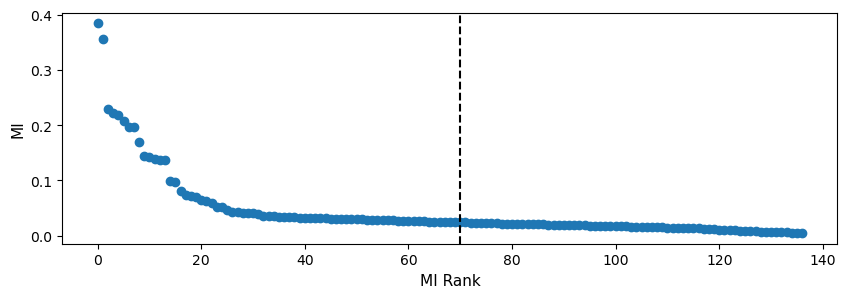

In [89]:
p = Preprocess(14)

p.select_features_MI(adata_ADT_CD4, adata_ADT_CD4.obs['Is_Stim_Positive'], n_top_features = 70,
                     max_scaled_thresh = None, quantile_thresh = .9999, makeplots=True)

(-20.0, 150.0)

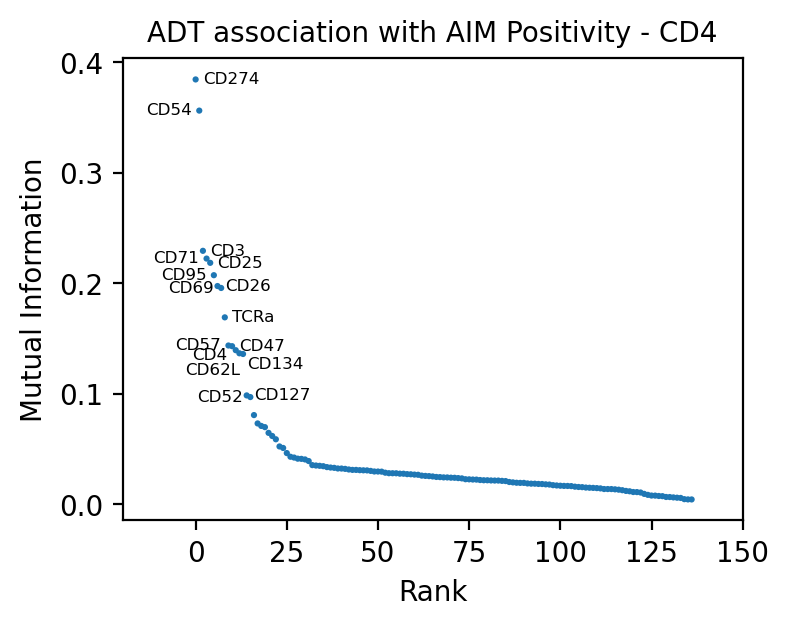

In [118]:
(fig,ax) = plt.subplots(1,1, figsize=(4,3), dpi=200)
MI_info = adata_ADT_CD4.var.sort_values(by='MI_Rank')
ax.scatter(MI_info['MI_Rank'], MI_info['MI'], s=5, edgecolor='None')
ax.set_xlabel('Rank', fontsize=10)
ax.set_ylabel('Mutual Information', fontsize=10)
ax.set_title('ADT association with AIM Positivity - CD4', fontsize=10)


for i,v in enumerate(MI_info.index[:16]):
    lab = v.replace('_prot', '').replace('Recombinant', '').split('_')[0]
    if v == 'CD134_or_OX40_prot':
        ax.text(MI_info.at[v, 'MI_Rank']+2, MI_info.at[v, 'MI']-.01, lab, fontsize=6, va='center', ha='left')
    elif v == 'CD4_prot':
        ax.text(MI_info.at[v, 'MI_Rank']-12, MI_info.at[v, 'MI']-.005, lab, fontsize=6, va='center', ha='left')
    elif v == 'CD62L_prot':
        ax.text(MI_info.at[v, 'MI_Rank']-16, MI_info.at[v, 'MI']-.015, lab, fontsize=6, va='center', ha='left')
    
    elif i % 2 == 0:
        ax.text(MI_info.at[v, 'MI_Rank']+2, MI_info.at[v, 'MI'], lab, fontsize=6, va='center', ha='left')
    else:
        ax.text(MI_info.at[v, 'MI_Rank']-2, MI_info.at[v, 'MI'], lab, fontsize=6, va='center', ha='right')    

ax.set_xlim([-20, 150])

In [ ]:
MI_info = adata_ADT_CD4.var.sort_values(by='MI_Rank')
toplot = list(MI_info.index[:5]) + ['CD134_or_OX40_prot' , 'CD4_prot', 'CD69_prot']
X = pd.DataFrame(adata_ADT_CD4[:,toplot].X, columns=toplot, index=adata_ADT_CD4.obs.index)
Xflat = X.unstack().reset_index()
Xflat.columns = ['Protein', 'Barcode', 'Expression']
Xflat = pd.merge(left=Xflat, right=adata_ADT_CD4.obs[['Biobank_ID', 'Sort_Status']], left_on='Barcode', right_index=True, how='left')
(fig,ax) = plt.subplots(1,1, figsize=(4,4), dpi=200)
sns.boxplot(x='Protein', y='Expression', hue='Sort_Status', data=Xflat, order=toplot, ax=ax)
labs = [x.replace('_prot', '').replace('CD274_or_B7-H1_PD-L1', 'PDL1').replace('CD134_or_OX40', 'OX40') for x in toplot]
ax.set_xticklabels(labs, rotation=90)
ax.set_ylabel('Expression')
ax.set_xlabel('Protein')
ax.legend(loc=(0.1,.7), title='Condition')
ax.set_title('Stimulation-associated markers - CD4')

In [128]:
MI_info = adata_ADT_CD4.var.sort_values(by='MI_Rank')
toplot = list(MI_info.index[:8]) + ['CD134_or_OX40_prot' , 'CD4_prot', 'CD69_prot']
X = pd.DataFrame(adata_ADT_CD4[:,toplot].X, columns=toplot, index=adata_ADT_CD4.obs.index)
Xflat = X.unstack().reset_index()
Xflat.columns = ['Protein', 'Barcode', 'Expression']
Xflat = pd.merge(left=Xflat, right=adata_ADT_CD4.obs[['Biobank_ID', 'Sort_Status']], left_on='Barcode', right_index=True, how='left')
Xflat_mean = Xflat.groupby(['Protein','Biobank_ID', 'Sort_Status']).mean().reset_index()

(fig,ax) = plt.subplots(1,1, figsize=(4,4), dpi=200)
sns.stripplot(x='Protein', y='Expression', hue='Sort_Status', data=Xflat_mean, order=toplot, ax=ax)
labs = [x.replace('_prot', '').replace('CD274_or_B7-H1_PD-L1', 'PDL1').replace('CD134_or_OX40', 'OX40').replace('CD95_or_Fas', 'FAS') for x in toplot]
ax.set_xticklabels(labs, rotation=90)
ax.set_ylabel('Expression')
ax.set_xlabel('Protein')
ax.legend(loc=(0.1,.7), title='Condition')
ax.set_title('Stimulation-associated markers - CD4')

NameError: name 'adata_ADT_CD4' is not defined

AnnData object with n_obs × n_vars = 14895 × 137
    obs: 'barcode', 'BRI', 'Run', 'Well', 'Batch', 'Biobank_ID', 'Sort_Status', 'HTO_Status', 'Demuxlet_Assignment', 'Total_RNA_Count', 'Total_ADT_Count', 'Total_HTO_Count', 'frac_ADT', 'A_cdr3', 'B_cdr3', 'DEMUX_RD.UNIQ', 'DEMUX_N.SNP', 'DEMUX_BEST', 'DEMUX_SNG.1ST', 'DEMUX_SNG.LLK1', 'DEMUX_DBL.1ST', 'DEMUX_DBL.2ND', 'DEMUX_LLK12', 'DEMUX_PRB.DBL', 'DEMUX_PRB.SNG1', 'batch_name', 'B_is_cell', 'B_high_confidence', 'B_full_length', 'B_productive', 'B_length', 'B_v_gene', 'B_d_gene', 'B_j_gene', 'B_c_gene', 'B_cdr1', 'B_cdr2', 'B_cdr3_nt', 'B_reads', 'B_umis', 'B_raw_clonotype_id', 'B_raw_consensus_id', 'B_Num_Hits_In_Barcode', 'B_Next_Highest_ReadCount', 'B_Num_Productive_In_Barcode', 'B_Has_Unproductive', 'A_is_cell', 'A_high_confidence', 'A_full_length', 'A_productive', 'A_length', 'A_v_gene', 'A_d_gene', 'A_j_gene', 'A_c_gene', 'A_cdr1', 'A_cdr2', 'A_cdr3_nt', 'A_reads', 'A_umis', 'A_raw_clonotype_id', 'A_raw_consensus_id', 'A_Num_Hit

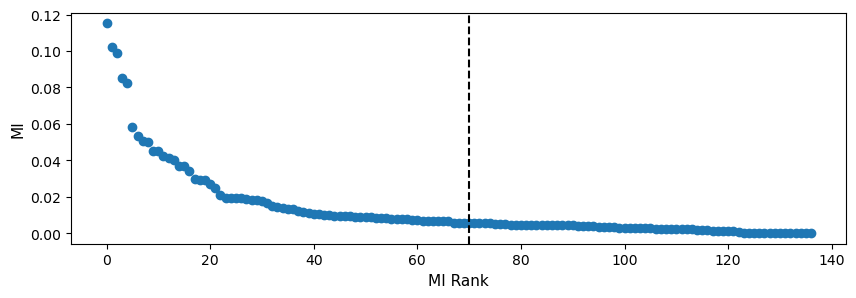

In [120]:
p = Preprocess(14)

p.select_features_MI(adata_ADT_CD8, adata_ADT_CD8.obs['Is_Stim_Positive'], n_top_features = 70,
                     max_scaled_thresh = None, quantile_thresh = .9999, makeplots=True)

(-20.0, 150.0)

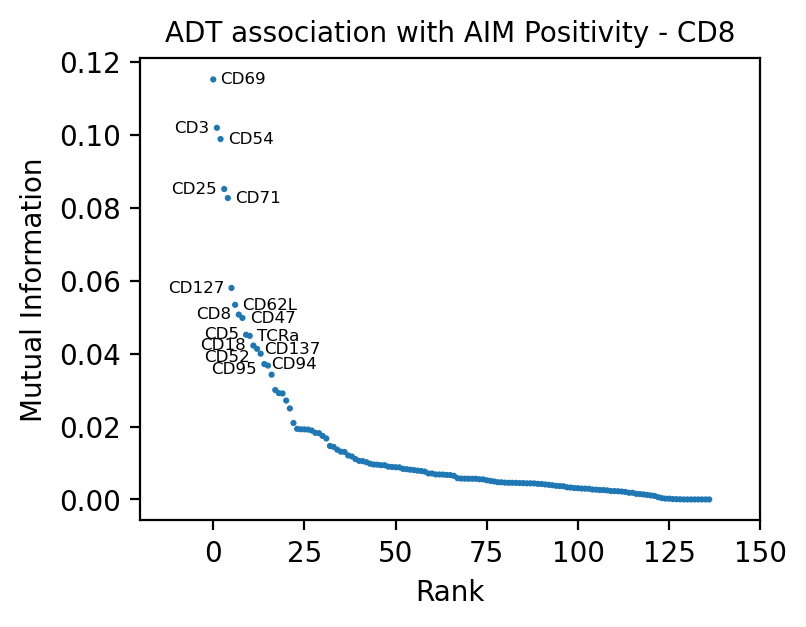

In [202]:
(fig,ax) = plt.subplots(1,1, figsize=(4,3), dpi=200)
MI_info = adata_ADT_CD8.var.sort_values(by='MI_Rank')
ax.scatter(MI_info['MI_Rank'], MI_info['MI'], s=5, edgecolor='None')
ax.set_xlabel('Rank', fontsize=10)
ax.set_ylabel('Mutual Information', fontsize=10)
ax.set_title('ADT association with AIM Positivity - CD8', fontsize=10)


for i,v in enumerate(MI_info.index[:16]):
    lab = v.replace('_prot', '').replace('Recombinant', '').split('_')[0]
    if v == 'CD95_or_Fas_prot':
        ax.text(MI_info.at[v, 'MI_Rank']-3, MI_info.at[v, 'MI']-.001, lab, fontsize=6, va='center', ha='right')
    elif v == 'CD52_prot':
        ax.text(MI_info.at[v, 'MI_Rank']-3, MI_info.at[v, 'MI']-.001, lab, fontsize=6, va='center', ha='right')
    elif i % 2 == 0:
        ax.text(MI_info.at[v, 'MI_Rank']+2, MI_info.at[v, 'MI'], lab, fontsize=6, va='center', ha='left')
    else:
        ax.text(MI_info.at[v, 'MI_Rank']-2, MI_info.at[v, 'MI'], lab, fontsize=6, va='center', ha='right')    

ax.set_xlim([-20, 150])

Text(0.5, 1.0, 'Stimulation-associated markers')

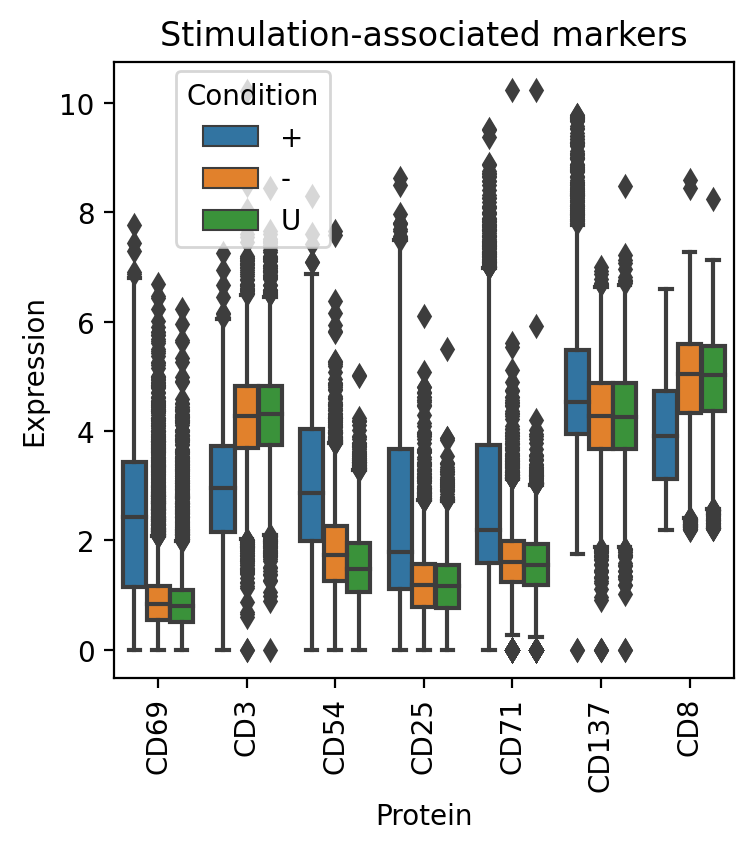

In [209]:
MI_info = adata_ADT_CD8.var.sort_values(by='MI_Rank')
toplot = list(MI_info.index[:5]) + ['CD137_or_4-1BB_prot' , 'CD8_prot']
X = pd.DataFrame(adata_ADT_CD8[:,toplot].X, columns=toplot, index=adata_ADT_CD8.obs.index)
Xflat = X.unstack().reset_index()
Xflat.columns = ['Protein', 'Barcode', 'Expression']
Xflat = pd.merge(left=Xflat, right=adata_ADT_CD8.obs[['Biobank_ID', 'Sort_Status']], left_on='Barcode', right_index=True, how='left')
(fig,ax) = plt.subplots(1,1, figsize=(4,4), dpi=200)
sns.boxplot(x='Protein', y='Expression', hue='Sort_Status', data=Xflat, order=toplot, ax=ax)
labs = [x.replace('_prot', '').replace('CD137_or_4-1BB', 'CD137') for x in toplot]
ax.set_xticklabels(labs, rotation=90)
ax.set_ylabel('Expression')
ax.set_xlabel('Protein')
ax.legend(loc=(0.1,.7), title='Condition')
ax.set_title('Stimulation-associated markers')

/tmp/ipykernel_63352/3949331226.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Xflat_mean = Xflat.groupby(['Protein','Biobank_ID', 'Sort_Status']).mean().reset_index()
/tmp/ipykernel_63352/3949331226.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labs, rotation=90)


Text(0.5, 1.0, 'Stimulation-associated markers - CD8')

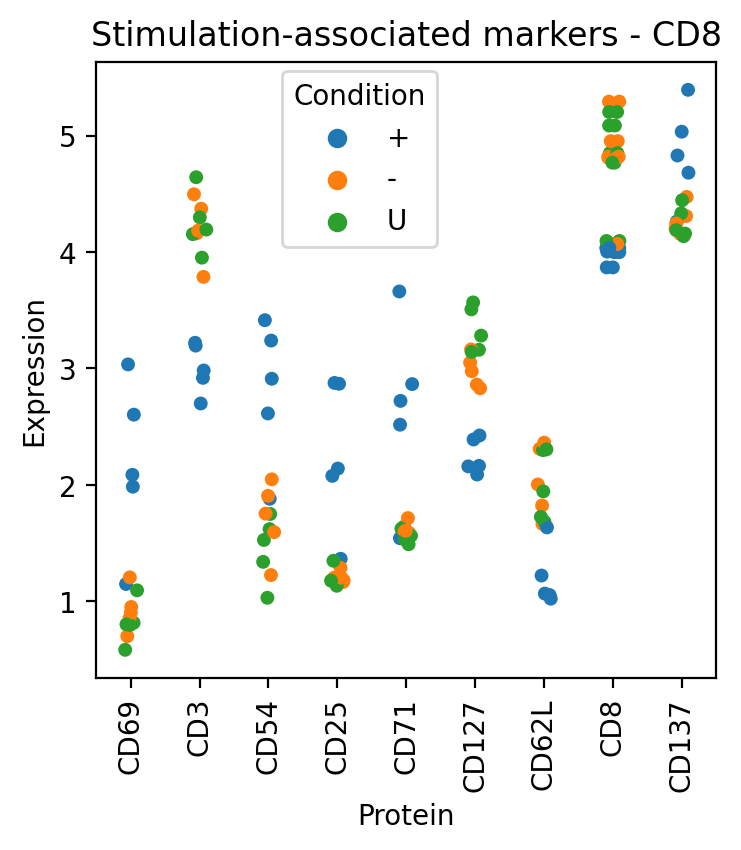

In [216]:
MI_info = adata_ADT_CD8.var.sort_values(by='MI_Rank')
toplot = list(MI_info.index[:8]) + ['CD137_or_4-1BB_prot' , 'CD8_prot']
X = pd.DataFrame(adata_ADT_CD8[:,toplot].X, columns=toplot, index=adata_ADT_CD8.obs.index)
Xflat = X.unstack().reset_index()
Xflat.columns = ['Protein', 'Barcode', 'Expression']
Xflat = pd.merge(left=Xflat, right=adata_ADT_CD8.obs[['Biobank_ID', 'Sort_Status']], left_on='Barcode', right_index=True, how='left')
Xflat_mean = Xflat.groupby(['Protein','Biobank_ID', 'Sort_Status']).mean().reset_index()
(fig,ax) = plt.subplots(1,1, figsize=(4,4), dpi=200)
sns.stripplot(x='Protein', y='Expression', hue='Sort_Status', data=Xflat_mean, order=toplot, ax=ax)
labs = [x.replace('_prot', '').replace('CD137_or_4-1BB', 'CD137').replace('CD127_or_IL-7Ra', 'CD127') for x in toplot]
ax.set_xticklabels(labs, rotation=90)
ax.set_ylabel('Expression')
ax.set_xlabel('Protein')
ax.legend(loc=(0.3,.7), title='Condition')
ax.set_title('Stimulation-associated markers - CD8')